Pairs trading is a trading strategy that long an equity and short an equity that these two have strong correltion. What we will do is to 
1. Find two equities with high correlation(normally higher than 0.8, but we could change it later)
2. We long the undervalue equity and short the overvalue one. 

refrences: 
1. https://medium.com/call-for-atlas/pairs-trading-strategy-every-stock-needs-a-friend-e50723a1dc94
2. https://www.linkedin.com/pulse/momentum-reversion-poor-mans-trading-strategies-adam-darmanin-vhrif



In [170]:
# Import the libraries
import pandas as pd
import numpy as np
import yfinance as yf

In [171]:
def get_historical_data(tickers, start_date, end_date):
    data = pd.DataFrame()

    for ticker in tickers:
        try:
            df = yf.Ticker(ticker).history(start=start_date, end=end_date)
            df = df[['Close']].reset_index()
            df = df.rename(columns={'Close': ticker})
            df['Date'] = pd.to_datetime(df['Date']).dt.date  # Keep only the date part
            df = df.set_index('Date') # Set 'Date' as the index again, if desired

            data = pd.concat([data, df], axis=1)

        except:
            print(f"{ticker} does not have price data.")

    return data

sp500 = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "V", "UNH", "JPM", "XOM", "JNJ", "WMT", "PG", "MA", "HD", "CVX", "PFE", "KO"]    

cyrpto_ticks = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'XRP-USD', 'ADA-USD', 'DOGE-USD', 'ETC-USD', 'XLM-USD', 'AAVE-USD', 'EOS-USD', 'XTZ-USD', 'ALGO-USD', 'XMR-USD', 'KCS-USD',
         'MKR-USD', 'BSV-USD', 'RUNE-USD', 'DASH-USD', 'KAVA-USD', 'ICX-USD', 'WAXP-USD', 'LSK-USD', 'EWT-USD', 'HIVE-USD', 'FTX-USD', 'RVN-USD', 'SXP-USD']

tw_ticks = ['2330.TW', '2317.TW', '2454.TW', '2308.TW', '2881.TW', '2382.TW', '2303.TW', '2882.TW', '2891.TW', '3711.TW', '2412.TW', '2886.TW', '2884.TW', '1216.TW', '2357.TW', '2885.TW', '2892.TW', '3034.TW', '2890.TW', '2327.TW', '5880.TW', '2345.TW', '3231.TW', '2002.TW', '2880.TW', '2883.TW', '3008.TW', '1303.TW', '4938.TW', '2207.TW', '1101.TW', '2887.TW', '2379.TW', '2603.TW', '1301.TW', '2301.TW', '5871.TW', '3037.TW', '3045.TW', '2912.TW', '3017.TW', '6446.TW', '4904.TW', '1326.TW', '3661.TW', '6669.TW', '5876.TW', '2395.TW', '1590.TW', '6505.TW']

total_ticks = tw_ticks
start_date = "2023-01-01"
# end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
end_date = "2023-12-31"
data = get_historical_data(total_ticks, start_date, end_date)
data.tail()



,2330.TW,2317.TW,2454.TW,2308.TW,2881.TW,2382.TW,2303.TW,2882.TW,2891.TW,3711.TW,...,3017.TW,6446.TW,4904.TW,1326.TW,3661.TW,6669.TW,5876.TW,2395.TW,1590.TW,6505.TW
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-25,571.320496,100.912506,928.903198,300.901154,58.979607,208.682770,47.553146,43.329659,26.602892,126.955498,...,305.893127,332.0,75.743057,59.914951,3341.899902,1795.855469,43.636032,354.816833,1013.714050,78.243378
2023-12-26,576.237244,101.400002,933.571045,304.828094,59.535145,209.166962,48.121510,43.667797,26.746174,128.409180,...,307.375641,333.0,75.935547,60.109795,3386.458496,1805.695801,43.924057,352.867279,999.022583,79.309898
2023-12-27,582.137207,100.912506,970.913879,307.282410,59.812912,208.682770,50.679150,43.909325,26.841698,129.378311,...,320.718323,339.5,76.416763,60.986599,3272.586426,1795.855469,44.596119,358.228516,994.125427,79.115982
2023-12-28,583.120605,101.400002,956.910339,307.282410,60.090683,210.135330,49.731876,44.247456,27.128262,131.316559,...,314.294067,346.0,76.801735,61.181446,3228.027588,1790.935425,44.980152,359.690674,999.022583,79.309898
2023-12-29,583.120605,101.887505,947.574585,307.773285,59.998096,217.398071,49.826603,44.199154,27.080502,130.832001,...,332.578491,346.0,76.801735,60.694332,3242.880615,1795.855469,44.932148,362.614990,989.228210,78.243378


In [172]:
# check if the data has na
print(data.isna().sum())

2330.TW    0
2317.TW    0
2454.TW    0
2308.TW    0
2881.TW    0
2382.TW    0
2303.TW    0
2882.TW    0
2891.TW    0
3711.TW    0
2412.TW    0
2886.TW    0
2884.TW    0
1216.TW    0
2357.TW    0
2885.TW    0
2892.TW    0
3034.TW    0
2890.TW    0
2327.TW    0
5880.TW    0
2345.TW    0
3231.TW    0
2002.TW    0
2880.TW    0
2883.TW    0
3008.TW    0
1303.TW    0
4938.TW    0
2207.TW    0
1101.TW    0
2887.TW    0
2379.TW    0
2603.TW    0
1301.TW    0
2301.TW    0
5871.TW    0
3037.TW    0
3045.TW    0
2912.TW    0
3017.TW    0
6446.TW    0
4904.TW    0
1326.TW    0
3661.TW    0
6669.TW    0
5876.TW    0
2395.TW    0
1590.TW    0
6505.TW    0
dtype: int64


In [173]:
cleaned_data = data.dropna(axis = 1)
cleaned_data.isna().sum()

2330.TW    0
2317.TW    0
2454.TW    0
2308.TW    0
2881.TW    0
2382.TW    0
2303.TW    0
2882.TW    0
2891.TW    0
3711.TW    0
2412.TW    0
2886.TW    0
2884.TW    0
1216.TW    0
2357.TW    0
2885.TW    0
2892.TW    0
3034.TW    0
2890.TW    0
2327.TW    0
5880.TW    0
2345.TW    0
3231.TW    0
2002.TW    0
2880.TW    0
2883.TW    0
3008.TW    0
1303.TW    0
4938.TW    0
2207.TW    0
1101.TW    0
2887.TW    0
2379.TW    0
2603.TW    0
1301.TW    0
2301.TW    0
5871.TW    0
3037.TW    0
3045.TW    0
2912.TW    0
3017.TW    0
6446.TW    0
4904.TW    0
1326.TW    0
3661.TW    0
6669.TW    0
5876.TW    0
2395.TW    0
1590.TW    0
6505.TW    0
dtype: int64

Find the correlation between different equities and choose which pair are the best

In [174]:
corr_matrix = cleaned_data.corr()
corr_matrix

,2330.TW,2317.TW,2454.TW,2308.TW,2881.TW,2382.TW,2303.TW,2882.TW,2891.TW,3711.TW,...,3017.TW,6446.TW,4904.TW,1326.TW,3661.TW,6669.TW,5876.TW,2395.TW,1590.TW,6505.TW
2330.TW,1.000000,0.606709,0.647629,0.620490,0.679623,0.622159,0.662069,0.679885,0.772330,0.862326,...,0.680970,-0.573432,0.605292,-0.521019,0.703973,0.732875,0.167294,0.766657,-0.130314,0.019962
2317.TW,0.606709,1.000000,0.091755,0.927392,0.494823,0.699943,0.140334,0.624336,0.452199,0.500884,...,0.708919,-0.640059,0.239311,-0.473368,0.403560,0.626549,-0.353900,0.768672,-0.528611,-0.161212
2454.TW,0.647629,0.091755,1.000000,0.068064,0.754795,0.540634,0.590879,0.575020,0.820507,0.862061,...,0.570614,-0.382630,0.694089,-0.632122,0.869095,0.650247,0.315935,0.263312,0.127770,-0.178929
2308.TW,0.620490,0.927392,0.068064,1.000000,0.511111,0.744034,0.063388,0.641763,0.450235,0.480376,...,0.753124,-0.642731,0.200213,-0.510212,0.412552,0.668762,-0.402244,0.801576,-0.582664,-0.241539
2881.TW,0.679623,0.494823,0.754795,0.511111,1.000000,0.868322,0.231208,0.930765,0.931906,0.857210,...,0.865343,-0.619636,0.586361,-0.735214,0.899978,0.835095,0.037489,0.527617,-0.383000,-0.317023
2382.TW,0.622159,0.699943,0.540634,0.744034,0.868322,1.000000,0.079752,0.871180,0.759177,0.758301,...,0.983492,-0.749052,0.457642,-0.883301,0.835832,0.908700,-0.361953,0.618284,-0.529512,-0.496780
2303.TW,0.662069,0.140334,0.590879,0.063388,0.231208,0.079752,1.000000,0.225229,0.376594,0.572402,...,0.156982,-0.199956,0.583325,-0.172496,0.391454,0.289897,0.457024,0.337239,0.502859,0.343129
2882.TW,0.679885,0.624336,0.575020,0.641763,0.930765,0.871180,0.225229,1.000000,0.811310,0.772301,...,0.870371,-0.669632,0.536235,-0.679199,0.793568,0.801430,-0.066630,0.581714,-0.403172,-0.205294
2891.TW,0.772330,0.452199,0.820507,0.450235,0.931906,0.759177,0.376594,0.811310,1.000000,0.906805,...,0.796905,-0.657707,0.718329,-0.680816,0.909995,0.826255,0.185300,0.623786,-0.275859,-0.167902
3711.TW,0.862326,0.500884,0.862061,0.480376,0.857210,0.758301,0.572402,0.772301,0.906805,1.000000,...,0.792208,-0.635500,0.734347,-0.725468,0.917226,0.818492,0.116102,0.597437,-0.174425,-0.138134


Turn the correlation into heatmap, which is easier to see.

<AxesSubplot: >

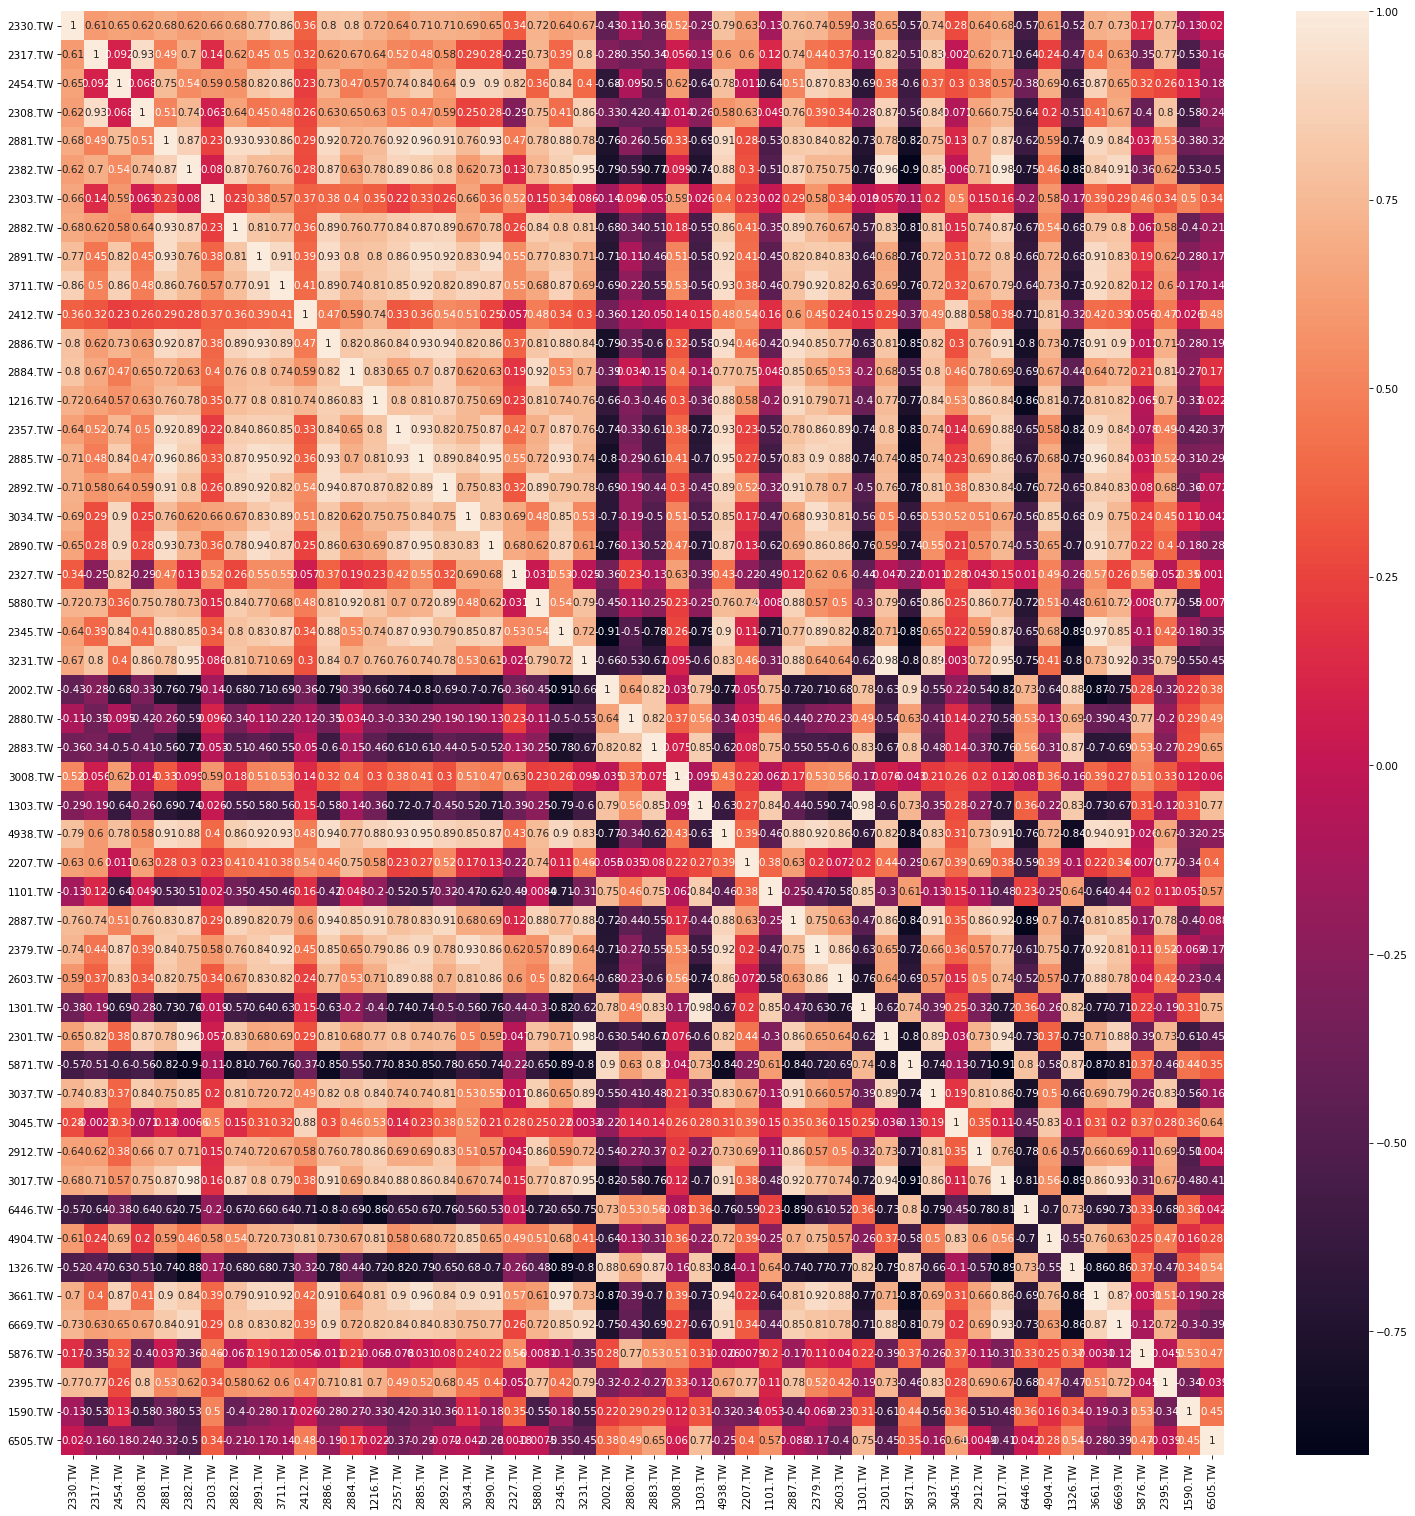

In [175]:
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize = (25, 25), dpi = 75)
sn.heatmap(corr_matrix, annot = True)

In [176]:
def get_high_correlation_pairs(correlation_matrix, threshold=0.97):
    """
    Find pairs of tickers with correlation above a specified threshold.
    
    Parameters:
    -----------
    correlation_matrix : pandas.DataFrame
        Correlation matrix of stock prices
    threshold : float, optional (default=0.95)
        Minimum correlation value to consider a pair
    
    Returns:
    --------
    list of tuples
        List of ticker pairs with correlation above the threshold
    """
    # Create an empty list to store highly correlated pairs
    high_corr_pairs = []
    
    # Iterate through the correlation matrix 
    # Use upper triangle to avoid duplicate pairs and self-correlations
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            # Get ticker names
            ticker1 = correlation_matrix.columns[i]
            ticker2 = correlation_matrix.columns[j]
            
            # Get correlation value
            corr_value = correlation_matrix.iloc[i, j]
            
            # Check if correlation is above threshold
            if abs(corr_value) >= threshold:
                high_corr_pairs.append((ticker1, ticker2, corr_value))
    
    # Sort pairs by correlation in descending order
    high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    return high_corr_pairs

# Example usage
high_correlation_pairs = get_high_correlation_pairs(corr_matrix)

pairs = []
# Print the results
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.4f}")
    pairs.append([pair[0], pair[1]])

print(pairs)


2382.TW and 3017.TW: Correlation = 0.9835
3231.TW and 2301.TW: Correlation = 0.9790
1303.TW and 1301.TW: Correlation = 0.9766
[['2382.TW', '3017.TW'], ['3231.TW', '2301.TW'], ['1303.TW', '1301.TW']]


Based on the heatmap, we can see some pairs of the crypto have high correlation, so we choose randomly and test their stationarity and cointegration.  

In [177]:
%pip install statsmodels
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [178]:
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from scipy import stats

coin_pairs = []
def testcointegration(stock1, stock2):
    Stock1 = data[stock1]
    Stock2 = data[stock2]

    adj_stock1 = stats.zscore(Stock1)
    adj_stock2 = stats.zscore(Stock2)

    # Cointegration test: A technique used to find a potential correlation in a time series 
    # Determines if the spread between the two assets are constant over time.
    # Null Hypothesis: Spread between series are non-stationary.
    # Uses the augmented Engle-Granger two-step cointegration test.
    result = ts.coint(adj_stock1, adj_stock2)
    
    
    if result[1] < 0.02:
        print(f'{result[1]} is the pvalue')
        print(f"{stock1} and {stock2} are cointegrated\n")
        coin_pairs.append([stock1, stock2])

        # figure(figsize = (12, 10), dpi = 100)
        # plt.plot(adj_stock1, label = f"{stock1}")
        # plt.plot(adj_stock2, label = f"{stock2}")
        # plt.legend()

        # figure(figsize = (12, 10), dpi = 100)
        # spread = adj_stock1 - adj_stock2
        # plt.plot(spread, label = "spread")
        # plt.axhline(np.mean(spread))
        # plt.axhline(-0.5, color = 'red', linestyle = "--")
        # plt.axhline(0.5, color = 'green', linestyle = "--")
        # plt.show()

    else:
        print("\n")


for i in range(len(pairs)-1):
        testcointegration(pairs[i][0], pairs[i][1])


In [179]:
# Find more cointegration test

In [180]:
# Calculate price ratio 
def priceratio_z(stock1, stock2):
    ratios = data[stock1] / data[stock2]
    ratios_mean = np.mean(ratios)
    ratios_std = np.std(ratios)
    ratios_z = (ratios - ratios_mean) / ratios_std
    
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.plot(ratios.index, ratios_z, label = "Z-score", color = 'blue')
    ax.axhline(1.0, color="green", linestyle='--', label="Upper Threshold (1.0)") # where we should short the stock1 and buy stock2 
    ax.axhline(-1.0, color="red", linestyle='--', label="Lower Threshold (-1.0)") # where we should buy the stock1 and short stock2
    ax.axhline(0, color="black", linestyle='--', label="Mean")
    ax.set_title(f'{stock1} / {stock2}: Price Ratio and Z-Score', fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price Ratio / Z-Score')
    ax.legend()
    plt.tight_layout()
    plt.show()

for i in range(len(coin_pairs)):
    priceratio_z(coin_pairs[i][0], coin_pairs[i][1])


In [181]:
# Back test the signal and see if this really work or not. 
def signals_zscore_evolution(ticker1, ticker2, window_size=15, first_ticker=True):
    """
    Generate trading signals based on z-score analysis of the ratio between two time series.
    Parameters:
    - ticker1 (pandas.Series): Time series data for the first security.
    - ticker2 (pandas.Series): Time series data for the second security.
    - window_size (int): The window size for calculating z-scores and ratios' statistics.
    - first_ticker (bool): Set to True to use the first ticker as the primary signal source, and False to use the second.Returns:
    - signals_df (pandas.DataFrame): A DataFrame with 'signal' and 'orders' columns containing buy (1) and sell (-1) signals.
    """
    ticker1 = data[ticker1]
    ticker2 = data[ticker2]
    ratios = ticker1 / ticker2 
    ratios_mean = ratios.rolling(window = window_size, min_periods = 1, center = False).mean()
    ratios_std  = ratios.rolling(window = window_size, min_periods = 1, center = False).std()
    z_score = (ratios - ratios_mean) / ratios_std

    buy = ratios.copy()
    sell = ratios.copy()
    if first_ticker:
        # These are empty zones, where there should be no signal
        # the rest is signalled by the ratio.
        buy[z_score > -1] = 0 # in this case, since the ratio is ticker1/ticker2, we should but
        sell[z_score < 1] = 0
    else:
        buy[z_score < 1] = 0
        sell[z_score > -1] = 0
    
    signals_df = pd.DataFrame(index=ticker1.index)
    signals_df['signal'] = np.where(buy > 0, 1, np.where(sell < 0, -1, 0))
    signals_df['orders'] = signals_df['signal'].diff()
    signals_df.loc[signals_df['orders'] == 0, 'orders'] = None
    
    return signals_df

In [190]:
# Calculate the profit

def calculate_profit(signals, stock1_prices, stock2_prices):
    """
    Calculate cumulative profit based on trading signals and stock prices.
    Parameters:
    - signals (pandas.DataFrame): A DataFrame containing trading signals (1 for buy, -1 for sell).
    - prices (pandas.Series): A Series containing stock prices corresponding to the signal dates.
    Returns:
    - cum_profit (pandas.Series): A Series containing cumulative profit over time.
    """
    profit = pd.DataFrame(index=stock1_prices.index)
    profit['ticker1_profit'] = 0.0
    profit['ticker2_profit'] = 0.0
    profit['cum_profit'] = 0.0

    buys = signals[signals['orders'] == 1].index
    sells = signals[signals['orders'] == -1].index

    if len(buys) == 0 or len(sells) == 0:
        # no actions taken
        return 0
    elif len(sells) < len(buys):
        # Assume we sell at the end
        sells = sells.append(pd.Index(stock1_prices.tail(1).index))
    elif len(sells) > len(buys):
        # Assume we buy at the end
        buys = buys.append(pd.Index(stock1_prices.tail(1).index))

    buy1_prices = stock1_prices.loc[buys]
    sell1_prices = stock1_prices.loc[sells]
    buy2_prices = stock2_prices.loc[buys]
    sell2_prices = stock2_prices.loc[sells]

    profit.loc[sells, 'ticker1_profit'] = np.round((sell1_prices.values - buy1_prices.values), 2)
    profit['ticker1_profit'] = profit['ticker1_profit'].fillna(0)
    
    profit.loc[sells, 'ticker2_profit'] = np.round(((-sell2_prices.values) + buy2_prices.values), 2)
    profit['ticker2_profit'] = profit['ticker2_profit'].fillna(0)
    
    # Make profit cumulative
    profit['cum_profit'] = profit['ticker1_profit'].cumsum() + profit['ticker2_profit'].cumsum()

    return profit['cum_profit']


In [183]:
def plot_strategy(prices_df, signal_df, profit):
    """
    Plot a trading strategy with buy and sell signals and cumulative profit.
    Parameters:
    - prices (pandas.Series): A Series containing stock prices.
    - signals (pandas.DataFrame): A DataFrame with buy (1) and sell (-1) signals.
    - profit (pandas.Series): A Series containing cumulative profit over time.
    Returns:
    - ax1 (matplotlib.axes.Axes): The top subplot displaying stock prices and signals.
    - ax2 (matplotlib.axes.Axes): The bottom subplot displaying cumulative profit.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': (3, 1)},
                                   figsize=(18, 12))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price in $')
    ax1.plot(prices_df.index, prices_df, color='g', lw=0.25)

    # Plot the Buy and Sell signals
    ax1.plot(signal_df.loc[signal_df.orders == 1.0].index,
             prices_df[signal_df.orders == 1.0],
             '^', markersize=12, color='blue', label='Buy')
    ax1.plot(signal_df.loc[signal_df.orders == -1.0].index,
             prices_df[signal_df.orders == -1.0],
             'v', markersize=12, color='red', label='Sell')

    ax2.plot(profit.index, profit, color='b')
    ax2.set_ylabel('Cumulative Profit(%)')
    ax2.set_xlabel('Date')

    return ax1, ax2

In [184]:
# 收益相關回測數值
# 總報酬率
# 年化報酬率
# 平均單筆報酬金額

def Returns(signals, prices, year):
    profit = pd.DataFrame(index=prices.index)
    profit['profit'] = 0.0
    profit['cum_profit'] = 0.0

    buys = signals[signals['orders'] == 1].index
    sells = signals[signals['orders'] == -1].index

    while sells[0] < buys[0]:
        # These are long only strategies, we cannot start with sell
        sells = sells[1:]

    if len(buys) == 0 or len(sells) == 0:
        # no actions taken
        return profit
    
    if len(sells) < len(buys):
        # Assume we sell at the end
        sells = sells.append(pd.Index(prices.tail(1).index))
        
    buy_prices = prices.loc[buys]
    sell_prices = prices.loc[sells]

    profit.loc[sells, 'profit'] = np.round((sell_prices.values - buy_prices.values), 2)
    profit['profit'] = profit['profit'].fillna(0)

    # Make profit cumulative
    profit['cum_profit'] = profit['profit'].cumsum()
    
    total_profit = np.round((profit['cum_profit'].iloc[-1] - profit['cum_profit'].iloc[0]), 3) # ROI
    annual_profit = np.round(((1.0 + total_profit)**(1.0/year)) - 1.0, 3) # Annualized return
    average_return = np.round(profit['cum_profit'].iloc[-1] / len(buy_prices), 3)


    print(f"總報酬: {total_profit}%")
    print(f"年化報酬: {annual_profit}%")
    print(f"平均單筆報酬金額: {average_return}")

In [185]:
# 風險相關回測數值
# 最大回檔(MDD)
# 波動率
# Sharpe Ratio
# 索丁諾比率 

def risks(signals, prices, year, risk_free_rate = 0.0163):
    profit = pd.DataFrame(index=prices.index)
    profit['profit'] = 0.0
    profit['cum_profit'] = 0.0

    buys = signals[signals['orders'] == 1].index
    sells = signals[signals['orders'] == -1].index

    while sells[0] < buys[0]:
        # These are long only strategies, we cannot start with sell
        sells = sells[1:]

    if len(buys) == 0 or len(sells) == 0:
        # no actions taken
        return profit
    
    if len(sells) < len(buys):
        # Assume we sell at the end
        sells = sells.append(pd.Index(prices.tail(1).index))

        
    buy_prices = prices.loc[buys]
    sell_prices = prices.loc[sells]

    profit.loc[sells, 'profit'] = np.round((sell_prices.values - buy_prices.values), 2)
    profit['profit'] = profit['profit'].fillna(0)

    # Make profit cumulative
    profit['cum_profit'] = profit['profit'].cumsum()

    # risk features 
    max_loss_in_a_trade = np.sort(profit['profit'])[0]

    rolling_max = profit['cum_profit'].expanding().max()
    drawdowns = profit['cum_profit'] - rolling_max
    mdd = drawdowns.min()    

    Risk_Return_Ratio = profit['cum_profit'].iloc[-1]/abs(mdd)
    Sharpe_ratio = (((profit['cum_profit'].iloc[-1])/year) - risk_free_rate) / (profit['profit'].std()*np.sqrt(252))
    

    print(f"單次交易最大跌幅: {max_loss_in_a_trade}%")
    print(f"MDD: {mdd}")
    print(f"風險報酬比: {Risk_Return_Ratio}")
    print(f"Sharpe Ratio: {Sharpe_ratio}")

<Figure size 2000x1600 with 0 Axes>

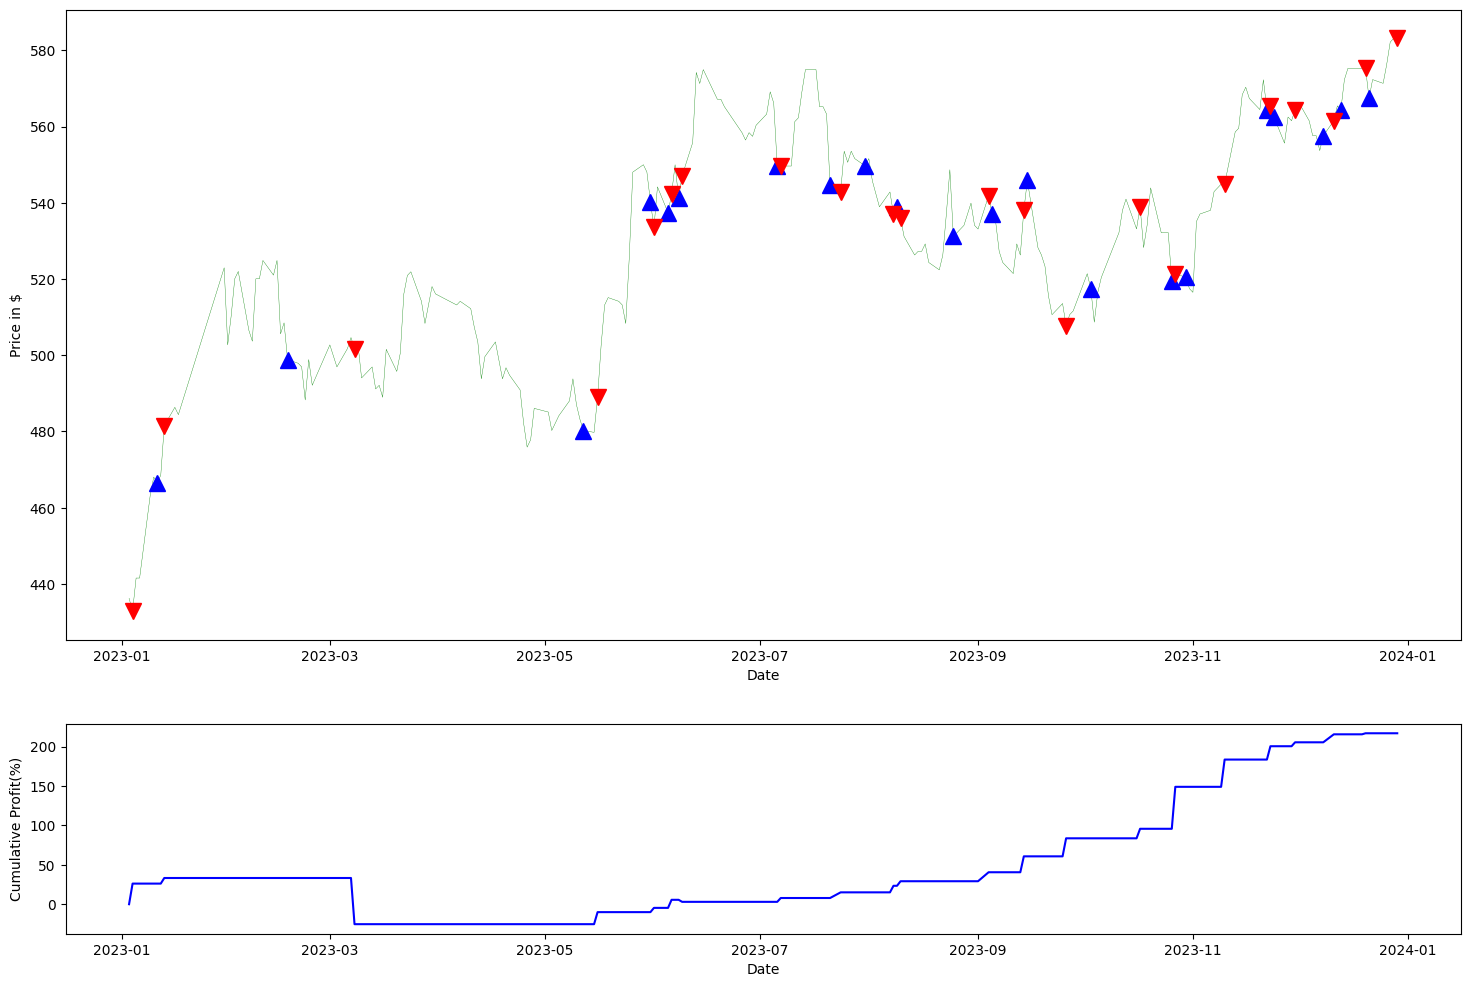

<Figure size 2000x1600 with 0 Axes>

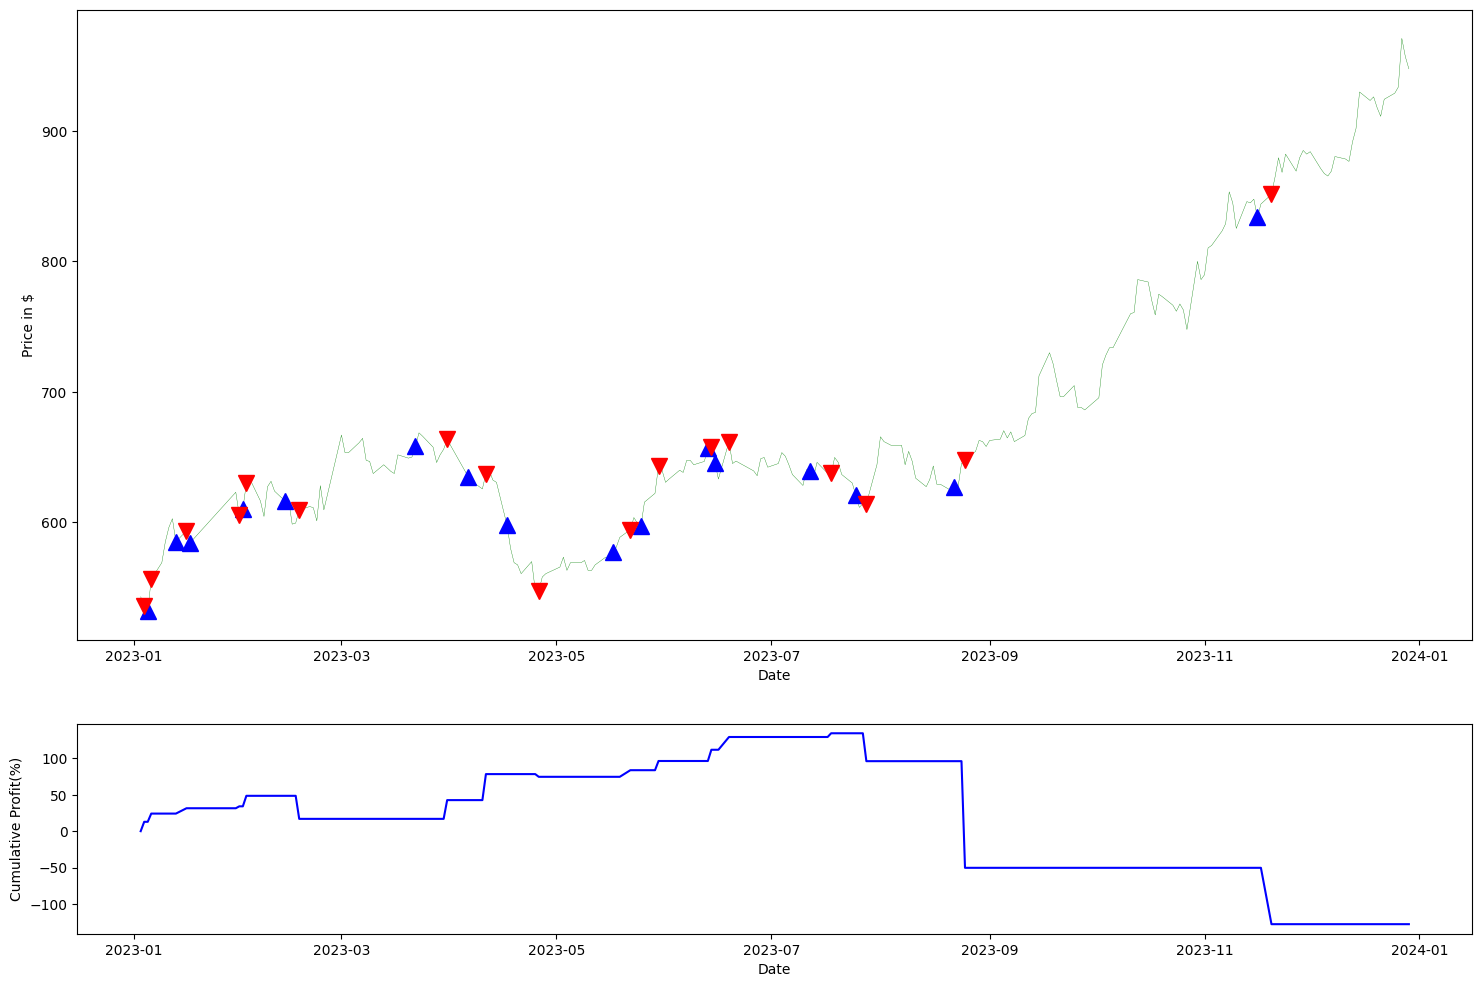

In [192]:
year = round(len(data)/252)
# print(year)

coin_pairs = [['2330.TW', '2454.TW']]

for i in range(len(coin_pairs)):   
    stock1 = data[coin_pairs[i][0]]
    stock2 = data[coin_pairs[i][1]]

    plt.figure(figsize=(20, 16))
    signals_df1 = signals_zscore_evolution(coin_pairs[i][0], coin_pairs[i][1])
    profit_df1 = calculate_profit(signals_df1, stock1, stock2)
    ax1, _ = plot_strategy(stock1, signals_df1, profit_df1)
    # Returns(signals_df1, stock1, 2)
    # risks(signals_df1, stock1, 2)

    plt.figure(figsize=(20, 16))
    signals_df2 = signals_zscore_evolution(coin_pairs[i][1], coin_pairs[i][0])
    profit_df2 = calculate_profit(signals_df2, stock2, stock1)
    ax2, _ = plot_strategy(stock2, signals_df2, profit_df2)
    # Returns(signals_df2, stock2, 2)
    # risks(signals_df2, stock2, 2)

    # ax1.legend(loc='upper left', fontsize=10)
    # ax1.set_title(f'{stock1.name} Paired with {stock2.name}', fontsize=16)
    # ax2.legend(loc='upper left', fontsize=10)
    # ax2.set_title(f'{stock2.name} Paired with {stock1.name}', fontsize=16)
    # plt.tight_layout()
    # plt.show()

    # plt.figure(figsize=(12, 6))
    # cumulative_profit_combined = profit_df1 + profit_df2
    # ax2_combined = cumulative_profit_combined.plot(label='Profit', color='green')
    # plt.legend(loc='upper left', fontsize=10)
    # plt.title(f'{stock1.name} & {stock2.name} Paired - Cumulative Profit', fontsize=18)
    # plt.tight_layout()
    # plt.show()

In [187]:
# 勝率相關回測數值
# 勝率
# 盈虧比

def win_rate(signals, prices):
    profit = pd.DataFrame(index=prices.index)
    profit['profit'] = 0.0
    profit['cum_profit'] = 0.0
    profit['diff'] = 0.0

    buys = signals[signals['orders'] == 1].index
    sells = signals[signals['orders'] == -1].index

    while sells[0] < buys[0]:
        # These are long only strategies, we cannot start with sell
        sells = sells[1:]

    if len(buys) == 0 or len(sells) == 0:
        # no actions taken
        return profit
    
    if len(sells) < len(buys):
        # Assume we sell at the end
        sells = sells.append(pd.Index(prices.tail(1).index))

        
    buy_prices = prices.loc[buys]
    sell_prices = prices.loc[sells]

    profit.loc[sells, 'profit'] = np.round((sell_prices.values - buy_prices.values), 2)
    profit['profit'] = profit['profit'].fillna(0)

    # 勝率算法 = 交易營利次數/總交易次數
    # profit的差為政的次數 / 總賣出次數

    profit['cum_profit'] = profit['profit'].cumsum()
    profit['diff'] = profit['cum_profit'].diff()
    print(profit['cum_profit'])
    print(profit['diff'])
    # Count wins and losses using sum()
    num_wins = (profit['diff'] > 0).sum()
    num_losses = (profit['diff'] < 0).sum()
    total_trades = num_wins + num_losses

    # Calculate win rate
    winrate = num_wins / total_trades if total_trades > 0 else 0
    
    print(f"Win rate: {winrate:.2%}")
    

In [188]:
for i in range(len(coin_pairs)):   
    stock1 = data[coin_pairs[i][0]]
    stock2 = data[coin_pairs[i][1]]

    # plt.figure(figsize=(20, 16))
    # signals_df1 = signals_zscore_evolution(coin_pairs[i][0], coin_pairs[i][1])
    # profit_df1 = calculate_profit(signals_df1, stock1, stock2)
    # ax1, _ = plot_strategy(stock1, signals_df1, profit_df1)
    # Returns(signals_df1, stock1, 2)
    # risks(signals_df1, stock1, 2)

    plt.figure(figsize=(20, 16))
    signals_df2 = signals_zscore_evolution(coin_pairs[i][1], coin_pairs[i][0])
    profit_df2 = calculate_profit(signals_df2, stock2, stock1)
    win_rate(signals_df2, stock2)
    # print(calculate_metrics(signals_df2, stock2))

Date
2023-01-03     0.00
2023-01-04     4.22
2023-01-05     0.00
2023-01-06   -28.67
2023-01-09     0.00
              ...  
2023-12-25     0.00
2023-12-26     0.00
2023-12-27     0.00
2023-12-28     0.00
2023-12-29     0.00
Name: ticker1_profit, Length: 239, dtype: float64
Date
2023-01-03     0.00
2023-01-04     8.67
2023-01-05     0.00
2023-01-06    39.97
2023-01-09     0.00
              ...  
2023-12-25     0.00
2023-12-26     0.00
2023-12-27     0.00
2023-12-28     0.00
2023-12-29     0.00
Name: ticker2_profit, Length: 239, dtype: float64
Date
2023-01-03      0.00
2023-01-04      0.00
2023-01-05      0.00
2023-01-06     24.45
2023-01-09     24.45
               ...  
2023-12-25    133.56
2023-12-26    133.56
2023-12-27    133.56
2023-12-28    133.56
2023-12-29    133.56
Name: cum_profit, Length: 239, dtype: float64
Date
2023-01-03      NaN
2023-01-04     0.00
2023-01-05     0.00
2023-01-06    24.45
2023-01-09     0.00
              ...  
2023-12-25     0.00
2023-12-26     0.00
202

<Figure size 2000x1600 with 0 Axes>